In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
dataset = pd.read_csv("d-tree_ds.csv")

In [4]:
dataset

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139
...,...,...
66,76,204
67,77,205
68,78,206
69,79,207


In [5]:
df = pd.DataFrame(dataset)

In [6]:
df

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139
...,...,...
66,76,204
67,77,205
68,78,206
69,79,207


In [7]:
# Split features and target
X = df[['Height']]    # Feature must be 2D ( independent)
y = df['Age']         # Target can be 1D (dependent)

In [8]:
X

,Height
0,138
1,138
2,138
3,139
4,139
...,...
66,204
67,205
68,206
69,207


In [9]:
y

0     10
1     11
2     12
3     13
4     14
      ..
66    76
67    77
68    78
69    79
70    80
Name: Age, Length: 71, dtype: int64

In [10]:
#splitting dataset into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(x_train.shape )
print(x_test.shape)

(53, 1)
(18, 1)


In [11]:
# Create and train the decision tree model

model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [12]:
#MSE compares the predicted values to the actual values and calculates the average squared difference.
y_pred= model.predict(x_test)               #Predict on test data
MSE = mean_squared_error(y_test, y_pred)    #Lower MSE means better model performance.

print("Predicted values:",y_pred)
print("Mean Squared Error:",MSE)

Predicted values: [34.5 34.5 57.  33.  39.  60.  17.  68.  42.  78.  67.  39.  39.  51.
 42.  64.  78.  73. ]
Mean Squared Error: 1.8055555555555556


In [13]:
# # Step 6: Visualization
# plt.figure(figsize=(12, 6))

# # Actual points
# plt.scatter(x_test, y_test, color='blue', label='Actual Data', s=100)

# # Predicted points
# plt.scatter(x_test, y_pred, color='red', label='Predicted  ', marker='x', s=100)

# # Connecting lines
# plt.plot(x_test, y_pred, color='orange', label='Regression Line', linewidth=2)
# plt.title("Actual vs Predicted")
# plt.xlabel("Height(cm)")
# plt.ylabel("Age")
# plt.legend()
# plt.grid(True)
# plt.show()

In [14]:
# Predict for full range
x_range = pd.DataFrame({'Height': range(min(df.Height), max(df.Height) + 1)})
y_pred_line = model.predict(x_range)

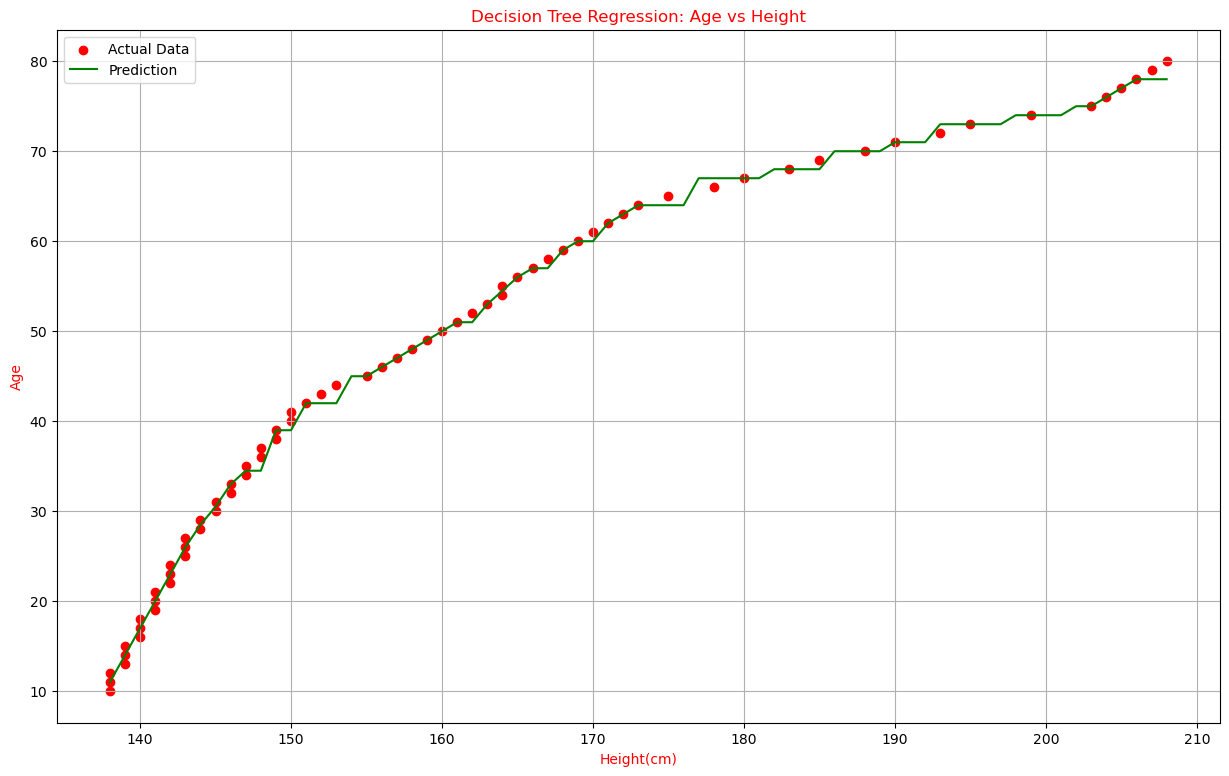

In [15]:
#Visualize the decision tree regression curve
plt.figure(figsize=(15,9))
plt.scatter(X, y, color='red', label='Actual Data')         # Original data points
plt.plot(x_range, y_pred_line, color='green', label='Prediction')  # Predicted line
plt.xlabel('Height(cm)',color='r')
plt.ylabel('Age',color='r')
plt.title('Decision Tree Regression: Age vs Height',color='r')
plt.legend()
plt.grid(True)
plt.show()

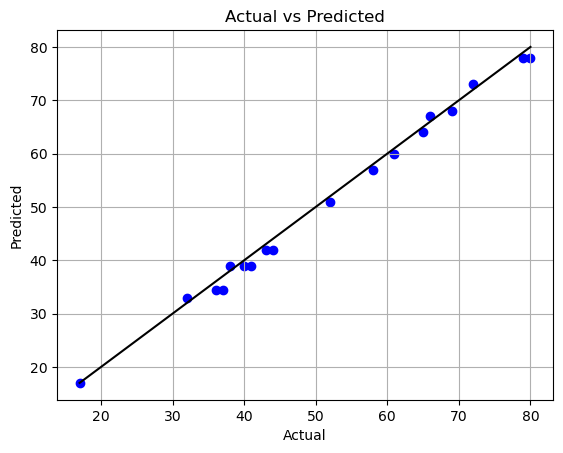

In [20]:
plt.figure()
plt.scatter(y_test, y_pred,color='blue')
min_val = min(y_test.values.min(), y_pred.min())
max_val = max(y_test.values.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val],color='black')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid()
plt.show()

In [16]:
# predict age for hight
hight = 254
prediction = model.predict([[hight]])
print('\n')
print(f"predicted age for {hight} cm :{prediction} years")



predicted age for 254 cm :[80.] years
